# Loading signals from audio files

In [3]:
import numpy as np
import librosa
import matplotlib.pyplot as plt

In [4]:
def loadsig(path, chansel=[], offset=0.0, duration=None, rate=None, dtype=np.float32):
    '''
    Load signal(s) from an audio file via `librosa.load`.
    
    This function does *not* follow librosa's default practices of (1) resampling
    to a standard sample rate; or (2) conversion of multichannel audio to mono.
    By default audio samples are returned at the same rate as the input file, and channels
    are returned along the first dimension of the output array `y`.

    Parameters
    ----------

    path : string, int, pathlib.Path, soundfile.SoundFile, audioread object, or file-like object
    The input audio file.

    chansel : int, list of int (default [])
    Selection of channels to be returned from the input audio file, starting
    with `0` for the first channel. For empty list `[]`, return all channels
    in order as they appear in the input audio file. This parameter can be used to
    select channels out of order, drop channels, and repeat channels.

    offset : float (default 0.0)
    start reading after this time (in seconds)

    duration : float
    only load up to this much audio (in seconds)

    rate : number > 0 [scalar]
    target sampling rate. 'None' returns `y` at the file's native sampling rate.

    dtype : numeric type (default float32)
    data type of `y`. No scaling is performed when the requested dtype differs from
    the native dtype of the file. Float types are usually scaled to the range `[-1.0, 1.0)`,
    and integer types potentially make use of the full range of integers available to
    their size, e.g. `int16` may be in the range `[-32768, 32767]`.

    Returns
    -------

    y : np.ndarray [shape=(n,) or (..., n)]
    audio time series. Multichannel is supported.

    rate : number > 0 [scalar]
    sampling rate of `y` 
    '''
    y, rate = librosa.load(
        path, sr=rate, mono=False, offset=offset, duration=duration, dtype=dtype
    )
    if y.ndim == 1:
        y = np.expand_dims(y, axis=0)
    if chansel == []:
        chansel = np.arange(y.shape[0], dtype=np.int16)
    return *list(y[chansel, :]), rate

## Examples

### Mono input, known

If you know the input file is mono, read the channel into a 1d array variable.

48000


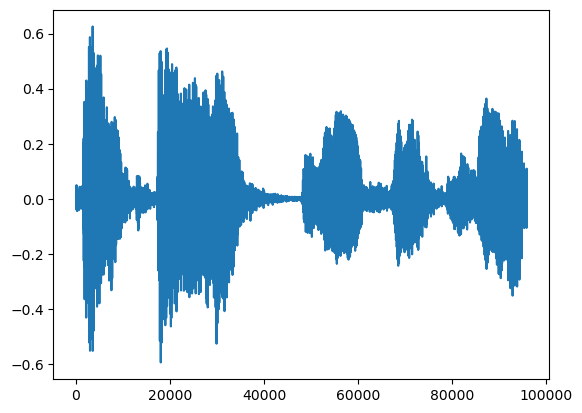

In [3]:
au, rate = loadsig('mono.wav')
print(rate)
plt.plot(au);

### Multichannel input, known

If you know the file contains multiple channels, read each channel into a separate 1d array variable.

48000


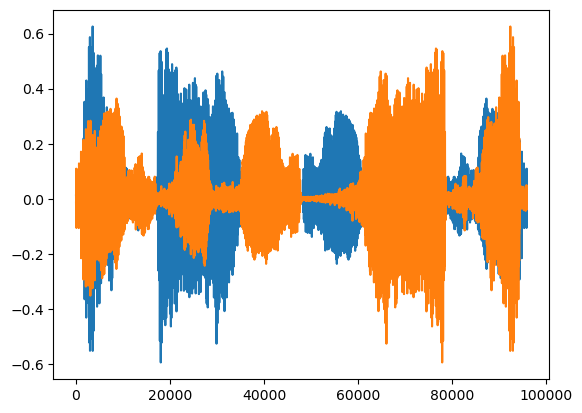

In [6]:
left, right, rate = loadsig('stereo.wav')
print(rate)
for c in (left, right):
    plt.plot(c);

48000


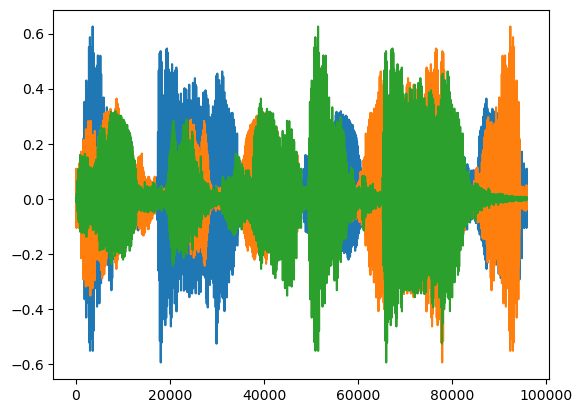

In [5]:
au, egg, nasal, rate = loadsig('threechan.wav')
print(rate)
for c in (au, egg, nasal):
    plt.plot(c);

### Unknown number of channels

When the number of channels in the file is not known at the outset there are two recommended options for handling the output values:

1. Use the `*` operator to handle the channels, and gather the rate separately: `*chans, rate = loadsig(...)`
2. Gather all channels and rate in a simple list, then access them separately: `all = loadsig(...)`

#### Option 1

Splat the channels into a list. All the examples in this section use the same code, except for the filename.

<class 'list'> 1
[array([ 0.01348877,  0.01596069,  0.01635742, ..., -0.02191162,
       -0.01809692, -0.01446533], dtype=float32)] 48000


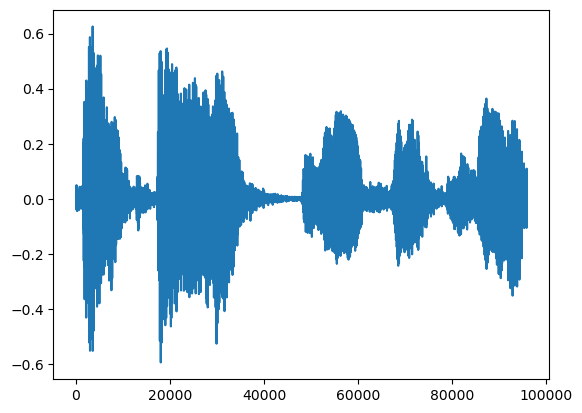

In [6]:
*chans, rate = loadsig('mono.wav')
print(type(chans), len(chans))
print(chans, rate)
for c in chans:
    plt.plot(c);

<class 'list'> 2
[array([ 0.01348877,  0.01596069,  0.01635742, ..., -0.02191162,
       -0.01809692, -0.01446533], dtype=float32), array([-0.01446533, -0.01809692, -0.02191162, ...,  0.01635742,
        0.01596069,  0.01348877], dtype=float32)] 48000


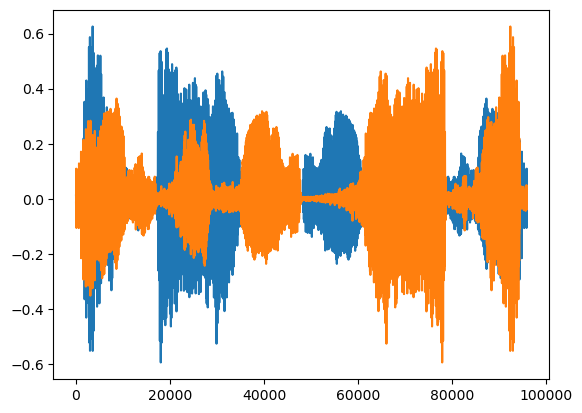

In [7]:
*chans, rate = loadsig('stereo.wav')
print(type(chans), len(chans))
print(chans, rate)
for c in chans:
    plt.plot(c);

<class 'list'> 3
[array([ 0.01065106,  0.00966707, -0.00929238, ..., -0.04192355,
       -0.03399398, -0.01585682], dtype=float32), array([-0.01066613, -0.03052825, -0.04055223, ..., -0.0088436 ,
        0.00373637,  0.01405141], dtype=float32), array([ 0.00168705,  0.00131574, -0.00069724, ...,  0.00450382,
        0.0038614 ,  0.00216338], dtype=float32)] 12000


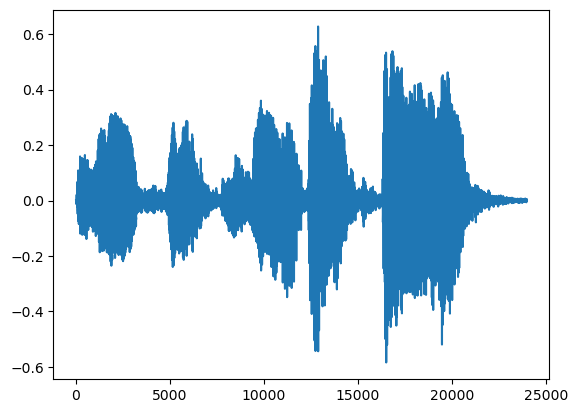

In [9]:
*chans, rate = loadsig('threechan.wav', rate = 12000)
print(type(chans), len(chans))
print(chans, rate)
plt.plot(chans[-1])


#### Option 2

Gather all return values as a tuple and unpack by index. All the examples in this section use the same code, except for the filename.

<class 'tuple'> 2
(array([ 0.01348877,  0.01596069,  0.01635742, ..., -0.02191162,
       -0.01809692, -0.01446533], dtype=float32),) 48000


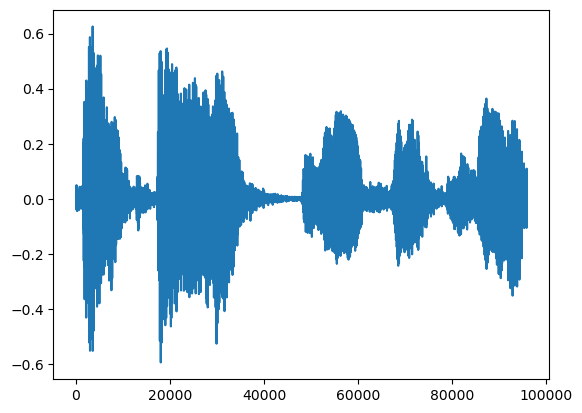

In [9]:
all = loadsig('mono.wav')
chans = all[:-1]
rate = all[-1]
print(type(all), len(all))
print(chans, rate)
for c in chans:
    plt.plot(c);

<class 'tuple'> 3
(array([ 0.01348877,  0.01596069,  0.01635742, ..., -0.02191162,
       -0.01809692, -0.01446533], dtype=float32), array([-0.01446533, -0.01809692, -0.02191162, ...,  0.01635742,
        0.01596069,  0.01348877], dtype=float32)) 48000


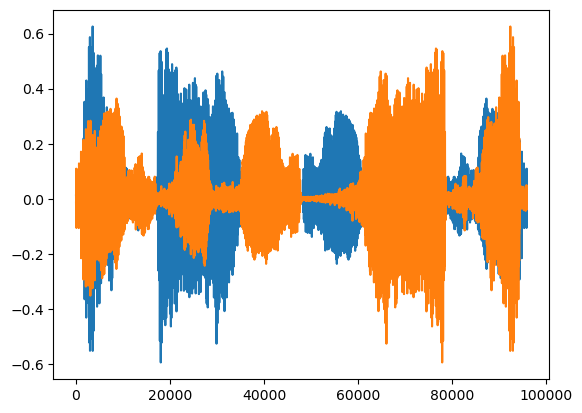

In [10]:
all = loadsig('stereo.wav')
chans = all[:-1]
rate = all[-1]
print(type(all), len(all))
print(chans, rate)
for c in chans:
    plt.plot(c);

<class 'tuple'> 4
(array([ 0.01348877,  0.01596069,  0.01635742, ..., -0.02191162,
       -0.01809692, -0.01446533], dtype=float32), array([-0.01446533, -0.01809692, -0.02191162, ...,  0.01635742,
        0.01596069,  0.01348877], dtype=float32), array([0.00253296, 0.00268555, 0.00210571, ..., 0.0027771 , 0.00219727,
       0.00201416], dtype=float32)) 48000


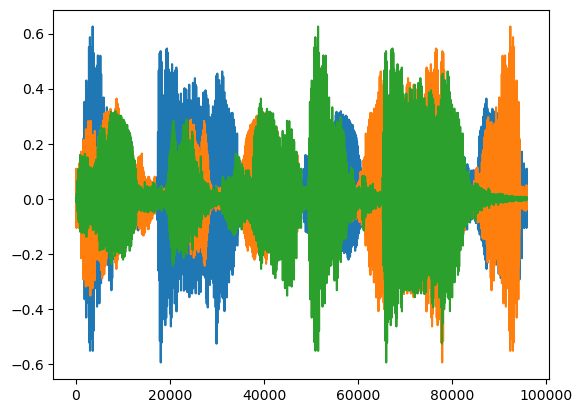

In [11]:
all = loadsig('threechan.wav')
chans = all[:-1]
rate = all[-1]
print(type(all), len(all))
print(chans, rate)
for c in chans:
    plt.plot(c);

### Raising errors

If you try to unpack the wrong number of channels from a file, an error occurs.

In [12]:
left, right, rate = loadsig('mono.wav')

ValueError: not enough values to unpack (expected 3, got 2)

In [13]:
left, right, rate = loadsig('threechan.wav')

ValueError: too many values to unpack (expected 3)

In [14]:
left, rate = loadsig('stereo.wav')

ValueError: too many values to unpack (expected 2)

In [15]:
left, middle, right, rate = loadsig('stereo.wav')

ValueError: not enough values to unpack (expected 4, got 3)

### Gotcha

There is one gotcha that I have noticed. If you intend to use the `Option 1` syntax for an unknown number of channels and forget to use the `*` operator, then your call looks exactly like the call for a mono input file. This would mean you get different results depending on the number of channels in the file.

For a mono input file, no error is raised, but `chans` does not contain the list you were expecting. Instead it is a 1d array.

<class 'numpy.ndarray'> 95910
[ 0.01348877  0.01596069  0.01635742 ... -0.02191162 -0.01809692
 -0.01446533] 48000


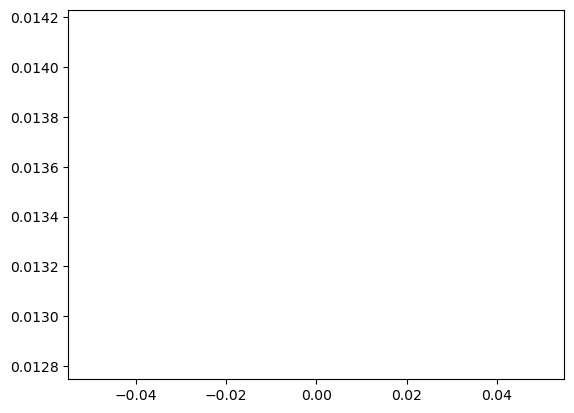

In [16]:
chans, rate = loadsig('mono.wav')  # No splat
print(type(chans), len(chans))
print(chans, rate)
plt.plot(chans[0]);

For a multichannel file an error is raised. Since the source of the error is outside of the function there is no way to provide an error message with an explanatory hint for the user.

In [17]:
chans, rate = loadsig('stereo.wav')  # No splat
print(chans, rate)
plt.plot(chans[0]);

ValueError: too many values to unpack (expected 2)

## Floating point coding

Loading a file with samples in floating point format in the range (-1.0,1.0) as 16 bit integers is very bad.  Now your samples take one of three values [-1,0,1].

In [28]:
au, rate = loadsig('mono_16bit_integer.wav')
print(f'max/min values in array: {np.max(au)}/{np.min(au)}')

au, rate = loadsig('mono_16bit_integer.wav',dtype=np.int16 )
print(f'max/min values in array: {np.max(au)}/{np.min(au)}')


max/min values in array: 0.6263427734375/-0.59228515625
max/min values in array: 20524/-19408


In [31]:
au, rate = loadsig('mono_32bit_float.wav')
print(f'max/min values in array: {np.max(au)}/{np.min(au)}')

au, rate = loadsig('mono_32bit_float.wav',dtype=np.int16)
print(f'max/min values in array: {np.max(au)}/{np.min(au)}')

max/min values in array: 0.6264258623123169/-0.5922759175300598
max/min values in array: 1/-1
